In [1]:
# noinspection PyPackageRequirements
import tensorflow as tf
from lib.utils import model ,preproc, newBuild, newGan
from keras.preprocessing.image import ImageDataGenerator

In [2]:
res = 256
channel = 3
# Preprocessing data with custom function
batch_size = 4
img_shape = (res,res,channel)
epochs = 100
latent_dim = 150
n_images = 16
image_dir = "../../oDig/mixed_port_256/"
checkpoint_dir = "../../checkpoints/mixed_port_256_check/"
data_loc = "../../datasets/mixed_port/"
#data_loc = "../../datasets/celeb/"
image_freq = 1
s = tf.random.normal([n_images, latent_dim]),
checkpoint_freq = 10

2022-05-04 13:43:22.972228: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 13:43:22.977292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 13:43:22.977644: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 13:43:22.978711: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
datagen = ImageDataGenerator(preprocessing_function=preproc.tanh_preprocess,
                             #vertical_flip=True,
                             horizontal_flip=True,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             rotation_range=5,
                             fill_mode='nearest'

                             )
train_dir = '/home/sandor/Dev/final/finalproject/gan/datasets/mixed_port'

dataset = datagen.flow_from_directory(
     train_dir,
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode=None
)

Found 1058 images belonging to 1 classes.


In [4]:
constants = dict(
    num_conv_layers = 4,
    img_shape = img_shape,
    dim = 16,
    output = channel,
    latent_dim = latent_dim,
    kernel = 4,
    stride = 2
)
callback = dict(
    num_img = n_images,
    cFreq = checkpoint_freq,
    iFreq = image_freq,
    seed = s,
    loc = image_dir
)
gan_attributes = dict(
    check_location= checkpoint_dir,
    b_size=  batch_size,
    l_dim= latent_dim,
    data = dataset,
    epochs=epochs,
)

In [11]:
name = 'Model_1-Same-Tanh-Batch-mDrop'
parameters = dict(
    model_name=name,
    filter_mode=3,
    gen_filter=7,
    disc_filter=6,
    is_batchnorm=True,
    is_multi_drop=True,
    is_tanh=True
)
model1 = model.ModelSettings(**constants, **parameters)
gan1 = newBuild.GANBuilder(atrib=model1, name=name, **gan_attributes)
g = newBuild.make_gan(gan1)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150)]             0         
                                                                 
 dense_2 (Dense)             (None, 32768)             4947968   
                                                                 
 batch_normalization_13 (Bat  (None, 32768)            131072    
 chNormalization)                                                
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 32768)             0         
                                                                 
 reshape_1 (Reshape)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 32, 32, 128)      262272    
 ranspose)                                               

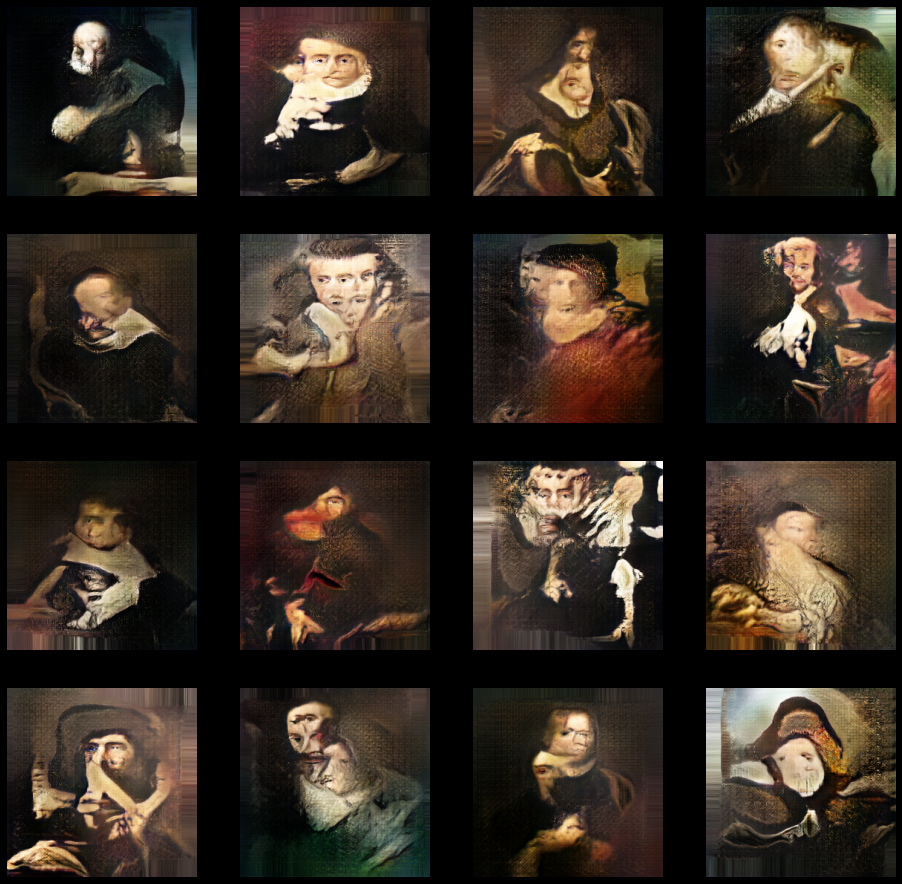

265/265 [==============================] - 35s 131ms/step - d_loss: 0.7183 - g_loss: 0.9286


In [12]:
g.fit(dataset, epochs=epochs, callbacks = [newGan.GANCallback(name= name,**callback)])

In [22]:
name = 'Model_2-Asc-Tanh-Batch-mDrop'
parameters = dict(
    model_name=name,
    filter_mode=1,
    gen_filter=5,
    disc_filter=6,
    is_batchnorm=True,
    is_multi_drop=True,
    is_tanh=True
)
model2 = model.ModelSettings(**constants, **parameters)
gan2 = newBuild.GANBuilder(atrib=model2, name=name, **gan_attributes)
g = newBuild.make_gan(gan2)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 150)]             0         
                                                                 
 dense_18 (Dense)            (None, 4096)              618496    
                                                                 
 batch_normalization_85 (Bat  (None, 4096)             16384     
 chNormalization)                                                
                                                                 
 leaky_re_lu_85 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_9 (Reshape)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_transpose_45 (Conv2D  (None, 32, 32, 32)       8224      
 Transpose)                                              

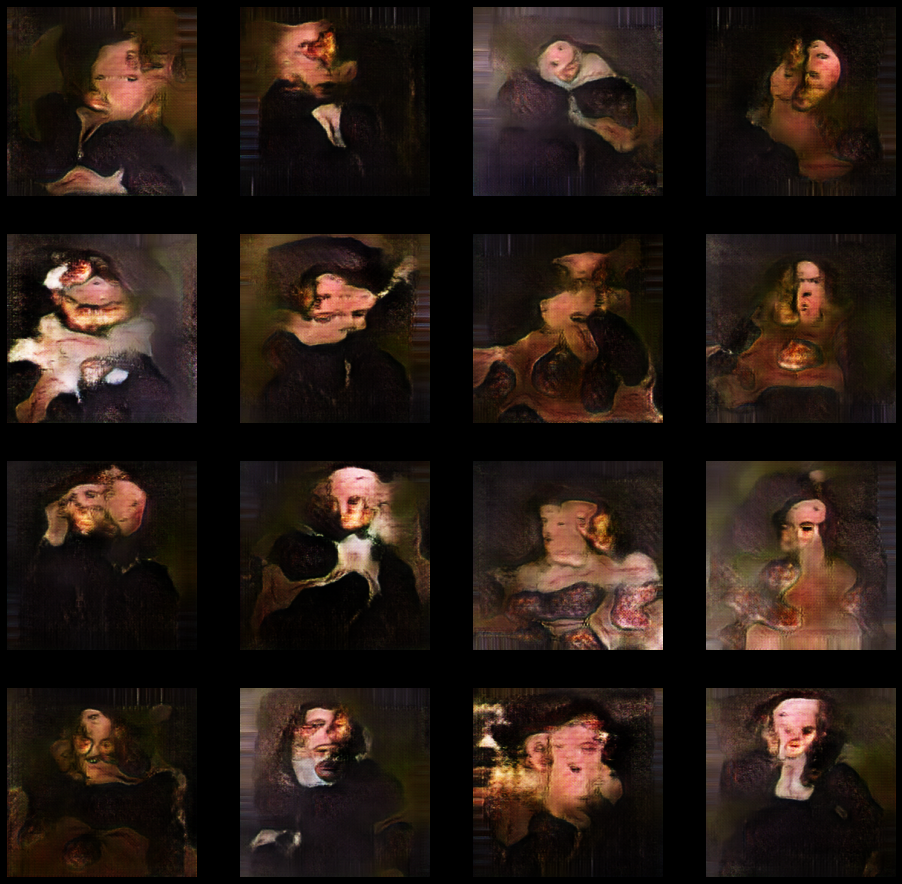

265/265 [==============================] - 48s 179ms/step - d_loss: 0.3952 - g_loss: 2.4746


In [ ]:
g.fit(dataset, epochs=epochs, callbacks = [newGan.GANCallback(name= name,**callback)])

In [18]:
name = 'Model_3-Asc-Tanh-Batch-mDrop'
parameters = dict(
    model_name=name,
    filter_mode=1,
    gen_filter=5,
    disc_filter=7,
    is_batchnorm=True,
    is_multi_drop=True,
    is_tanh=True
)
model3 = model.ModelSettings(**constants, **parameters)
gan3 = newBuild.GANBuilder(atrib=model3, name=name, **gan_attributes)
g = newBuild.make_gan(gan3)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 150)]             0         
                                                                 
 dense_14 (Dense)            (None, 4096)              618496    
                                                                 
 batch_normalization_67 (Bat  (None, 4096)             16384     
 chNormalization)                                                
                                                                 
 leaky_re_lu_67 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_7 (Reshape)         (None, 16, 16, 16)        0         
                                                                 
 conv2d_transpose_35 (Conv2D  (None, 32, 32, 32)       8224      
 Transpose)                                              

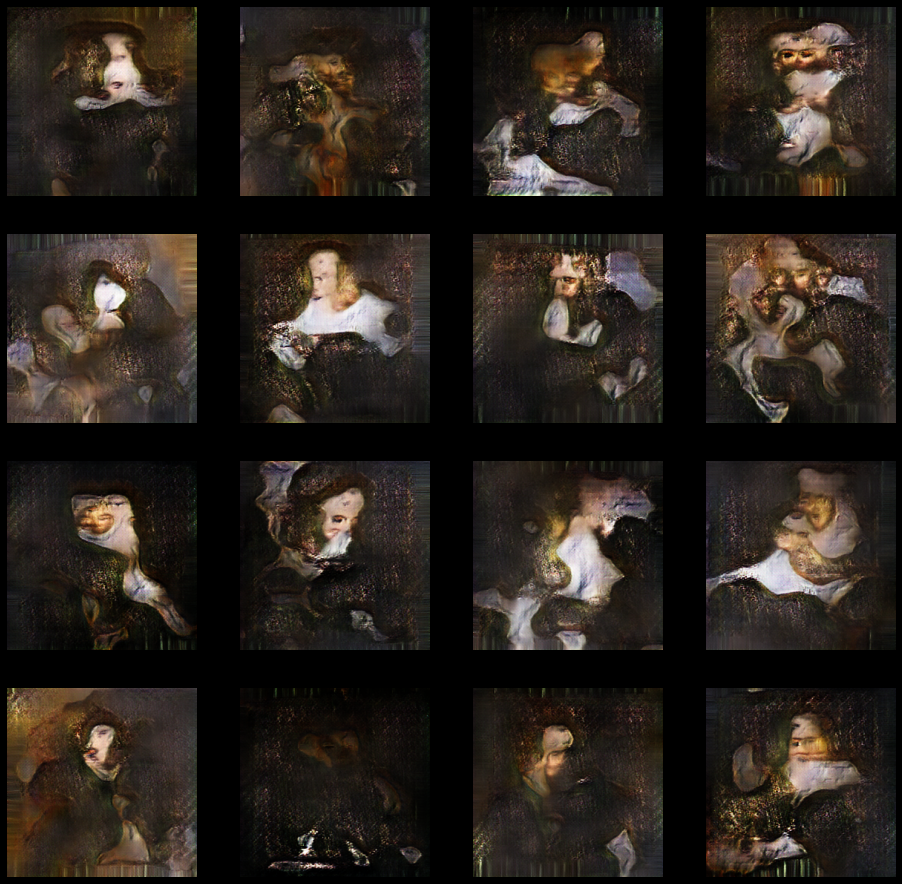

265/265 [==============================] - 50s 190ms/step - d_loss: 0.3400 - g_loss: 3.0752


In [19]:
g.fit(dataset, epochs=epochs, callbacks = [newGan.GANCallback(name= name,**callback)])